In [227]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Steps

## Business Goal

Predict the salary based on the years of experience

## Read the Data

In [228]:
file = "P:/Datasets/salary-data-simple-linear-regression/Salary_Data.csv"
df = pd.read_csv(file)

## Data Analysis

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [230]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


In [231]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [232]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [233]:
df.duplicated().sum()

0

## Visualising the data

Text(0, 0.5, 'Salary')

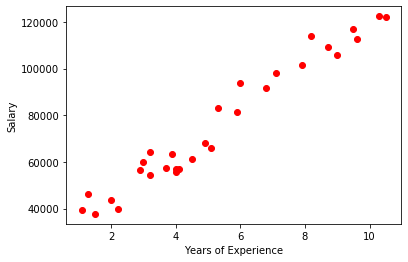

In [234]:
plt.scatter(df.YearsExperience,df.Salary, c='r')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

In [235]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


###### There is a high correlation between YearsExperience and Salary and therefore we can use linear regression to fit the data. There are no outliers.

###### Linear Regression is a supervised machine learning algorithm.It preditcs dependent variable(y) for a given independent variable(x).Basically, it will try to find a linear releastionship between x and y.

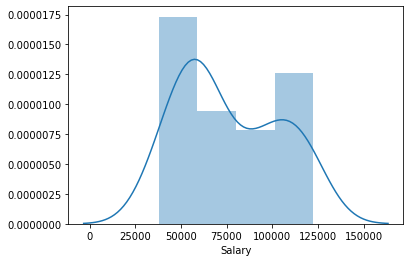

In [236]:
sns.distplot(df.Salary)

(array([ 6., 11.,  2.,  4.,  7.]),
 array([ 37731.,  54663.,  71595.,  88527., 105459., 122391.]),
 <a list of 5 Patch objects>)

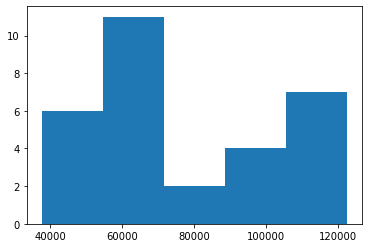

In [237]:
plt.hist(df.Salary, bins=5)

Lets train the model using LinearRegression algorithm. Lets split the data in to X arrays(features) and y arrays(target variables).

In [238]:
X = df[['YearsExperience']].values
y = np.array(df['Salary'])

In [239]:
print(X.ndim,y.ndim)

2 1


Now lets split the data in to trainig and testing data using train_test_split.
We can use the training dataset to train the model and testing dataset to evaluate the model performance.

In [240]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print(X_train.shape,X_test.shape)

(21, 1) (9, 1)


#### Assumptions for Linear Regression Models

#### Linear Assumption:
Linear Regression algorithm assumes the data has a linear relationship. When we have a lot of features,
we need to transform to have linear relationship.

#### Remove Noise:

Linear Regression assumes the input and output varibles are noise free. Remove outliers in the data.

#### Remove Collinearity:

The model will overfit we we have highly correlated fetures. Use pairwise plot to see the correlations
and remove the most correlated

#### Gaussian Distribution:

The model will make reliabel predictions if x and y have normal distribution. To make variables look more gaussian,
apply transforms(log, BoxCox) on the variables.Use displot or histplot to see the distribution.

#### Rescaling Features:

Rescale the features to normalise the data. Use StandarScaler and MinMaxScaler to Standardize and normalize the data

## Linear Regression

In [241]:
linear = LinearRegression()
linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Model Evaluation:

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**R-squared**
R-squared is a statistical measure that represents the goodness of fit of a regression model. The ideal value for r-square is 1. The closer the value of r-square to 1, the better is the model fitted. ... Note : The value of R-square can also be negative when the models fitted is worse than the average fitted model.

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [242]:
def print_evaluate(actual,predict):
    mae = mean_absolute_error(actual,predict)
    mse = mean_squared_error(actual,predict)
    rmse = np.sqrt(mse)
    r2_square = r2_score(actual,predict)
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)    
    print("R2_SQUARE:", r2_square)
    
def evaluate(actual,predict):
    mae = mean_absolute_error(actual,predict)
    mse = mean_squared_error(actual,predict)
    rmse = np.sqrt(mse)
    r2_square = r2_score(actual,predict)
    return mae,mse,rmse,r2_square


In [243]:
y_predict = linear.predict(X_test)

In [244]:
print_evaluate(y_test,y_predict)

MAE: 5161.328710400183
MSE: 37784662.46621314
RMSE: 6146.92300799458
R2_SQUARE: 0.9414466227178214


#### Predictions from Model

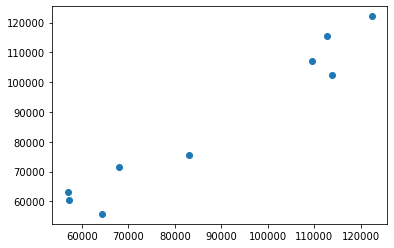

In [245]:
plt.scatter(y_test,y_predict)

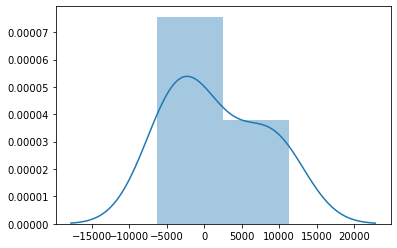

In [246]:
sns.distplot(y_test-y_predict)

In [247]:
results_df = pd.DataFrame([["Linear Regression", *evaluate(y_test,y_predict)]],
                          columns=['Model','MAE','MSE','RMSE','R2_SQUARE'])
results_df

,Model,MAE,MSE,RMSE,R2_SQUARE
0,Linear Regression,5161.32871,3.778466e+07,6146.923008,0.941447


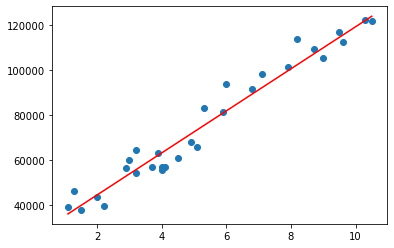

In [248]:
plt.scatter(X,y)
plt.plot(X,linear.predict(X),c='r')

Lets normalize the data to improve the model performance

In [249]:
print(linear.coef_,linear.intercept_)

[9339.08172382] 25918.438334893202


## Gradient Descent

It is a optimization algorithm is to find a minimum of a function. Here, our function is cost function.

In [324]:
x = df.iloc[:,[1]]


In [323]:
m=0
b=0
epoch = 1000
l = 0.025
x = df.iloc[:,0]
n = float(len(x)) # Number of elements in X

 
for i in range(epoch):
    y_pred = m*x +b
    D_m = (-2/n) * sum(x * (y - y_pred))  # Derivative wrt m
    D_b = (-2/n) * sum(y - y_pred)  # Derivative wrt b
    m = m - l*D_m
    b = b - l*D_b
    print("M = %d,b = %d, MSE = %d" %(m,b,(mean_squared_error(y,y_pred))))


M = 23869,b = 3800, MSE = 6502955270
M = 3744,b = 1068, MSE = 4634089702
M = 20587,b = 3820, MSE = 3313903645
M = 6367,b = 1960, MSE = 2381117803
M = 18249,b = 3970, MSE = 1721863506
M = 8200,b = 2724, MSE = 1255745512
M = 16579,b = 4209, MSE = 926001901
M = 9474,b = 3394, MSE = 692556642
M = 15380,b = 4508, MSE = 527114486
M = 10354,b = 3996, MSE = 409697796
M = 14515,b = 4846, MSE = 326201444
M = 10957,b = 4547, MSE = 266666488
M = 13886,b = 5209, MSE = 224061330
M = 11365,b = 5059, MSE = 193421179
M = 13423,b = 5587, MSE = 171240481
M = 11635,b = 5542, MSE = 155043952
M = 13079,b = 5974, MSE = 143083722
M = 11808,b = 6000, MSE = 134125500
M = 12819,b = 6363, MSE = 127297606
M = 11913,b = 6440, MSE = 121984376
M = 12618,b = 6753, MSE = 117750912
M = 11970,b = 6863, MSE = 114289940
M = 12460,b = 7140, MSE = 111384306
M = 11994,b = 7273, MSE = 108880478
M = 12332,b = 7523, MSE = 106669858
M = 11995,b = 7670, MSE = 104675569
M = 12225,b = 7900, MSE = 102843138
M = 11980,b = 8057, MSE = 

M = 9741,b = 23830, MSE = 32120646
M = 9737,b = 23851, MSE = 32102768
M = 9734,b = 23871, MSE = 32085266
M = 9731,b = 23892, MSE = 32068133
M = 9728,b = 23912, MSE = 32051360
M = 9725,b = 23932, MSE = 32034940
M = 9723,b = 23951, MSE = 32018865
M = 9720,b = 23971, MSE = 32003128
M = 9717,b = 23990, MSE = 31987723
M = 9714,b = 24009, MSE = 31972642
M = 9711,b = 24028, MSE = 31957878
M = 9708,b = 24047, MSE = 31943425
M = 9706,b = 24065, MSE = 31929275
M = 9703,b = 24083, MSE = 31915424
M = 9700,b = 24101, MSE = 31901864
M = 9698,b = 24119, MSE = 31888589
M = 9695,b = 24137, MSE = 31875594
M = 9692,b = 24154, MSE = 31862872
M = 9690,b = 24172, MSE = 31850417
M = 9687,b = 24189, MSE = 31838225
M = 9685,b = 24206, MSE = 31826289
M = 9682,b = 24223, MSE = 31814605
M = 9680,b = 24239, MSE = 31803166
M = 9677,b = 24256, MSE = 31791968
M = 9675,b = 24272, MSE = 31781006
M = 9673,b = 24288, MSE = 31770274
M = 9670,b = 24304, MSE = 31759768
M = 9668,b = 24320, MSE = 31749483
M = 9666,b = 24335, 

M = 9470,b = 25654, MSE = 31275124
M = 9470,b = 25656, MSE = 31275036
M = 9469,b = 25657, MSE = 31274950
M = 9469,b = 25659, MSE = 31274866
M = 9469,b = 25660, MSE = 31274784
M = 9469,b = 25661, MSE = 31274703
M = 9469,b = 25663, MSE = 31274624
M = 9468,b = 25664, MSE = 31274547
M = 9468,b = 25665, MSE = 31274471
M = 9468,b = 25667, MSE = 31274397
M = 9468,b = 25668, MSE = 31274325
M = 9468,b = 25669, MSE = 31274254
M = 9467,b = 25671, MSE = 31274184
M = 9467,b = 25672, MSE = 31274116
M = 9467,b = 25673, MSE = 31274050
M = 9467,b = 25674, MSE = 31273985
M = 9467,b = 25676, MSE = 31273921
M = 9466,b = 25677, MSE = 31273858
M = 9466,b = 25678, MSE = 31273797
M = 9466,b = 25679, MSE = 31273737
M = 9466,b = 25681, MSE = 31273679
M = 9466,b = 25682, MSE = 31273621
M = 9466,b = 25683, MSE = 31273565
M = 9465,b = 25684, MSE = 31273510
M = 9465,b = 25685, MSE = 31273456
M = 9465,b = 25686, MSE = 31273403
M = 9465,b = 25687, MSE = 31273352
M = 9465,b = 25689, MSE = 31273301
M = 9465,b = 25690, 

M = 9450,b = 25788, MSE = 31270955
M = 9450,b = 25788, MSE = 31270955
M = 9450,b = 25788, MSE = 31270955
M = 9450,b = 25788, MSE = 31270955
M = 9450,b = 25788, MSE = 31270955
M = 9450,b = 25788, MSE = 31270955
M = 9450,b = 25788, MSE = 31270955
M = 9450,b = 25788, MSE = 31270954
M = 9450,b = 25788, MSE = 31270954
M = 9450,b = 25788, MSE = 31270954
M = 9450,b = 25788, MSE = 31270954
M = 9450,b = 25788, MSE = 31270954
M = 9450,b = 25788, MSE = 31270954
M = 9450,b = 25788, MSE = 31270954
M = 9450,b = 25788, MSE = 31270954
M = 9450,b = 25788, MSE = 31270954
M = 9450,b = 25788, MSE = 31270954
M = 9450,b = 25788, MSE = 31270954
M = 9450,b = 25788, MSE = 31270954
M = 9450,b = 25788, MSE = 31270954
M = 9450,b = 25788, MSE = 31270954
M = 9450,b = 25788, MSE = 31270954
M = 9450,b = 25788, MSE = 31270954
M = 9450,b = 25788, MSE = 31270954
M = 9450,b = 25789, MSE = 31270953
M = 9450,b = 25789, MSE = 31270953
M = 9450,b = 25789, MSE = 31270953
M = 9450,b = 25789, MSE = 31270953
M = 9450,b = 25789, 

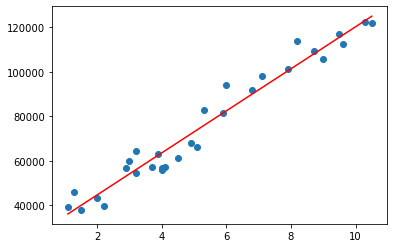

In [316]:
Y_pred = 9449*X + 25792
plt.scatter(X, y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

In [321]:
r2_score(y,Y_pred)

0.9569566153601797

In [326]:
results_df = pd.DataFrame([["Linear Regression", *evaluate(y,Y_pred)]],
                          columns=['Model','MAE','MSE','RMSE','R2_SQUARE'])
results_df

,Model,MAE,MSE,RMSE,R2_SQUARE
0,Linear Regression,4643.88,3.127099e+07,5592.046778,0.956957


The accuracy imporved using Gradient Descent Optimization